# Modelagem magnética 3D de uma esfera

## Importando as bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
import sphere_mag

## Gerando os parâmetros do sistema de coordenadas 

In [3]:
Nx = 100
Ny = 50
area = [-1000.,1000.,-1000.,1000.]
shape = (Nx,Ny)

In [4]:
x = np.linspace(area[0],area[1],num=Nx)
y = np.linspace(area[2],area[3],num=Ny) 
yc,xc = np.meshgrid(y,x)

In [5]:
voo = -200.
zc = voo*np.ones_like(xc)

In [6]:
coordenadas = np.array([yc.ravel(),xc.ravel(),zc.ravel()])

## Gerando os parâmetros do prisma

In [7]:
intensidades = np.array([50.])

In [8]:
direcoes = np.array([[90.,0.]])

In [9]:
modelo = np.array([[0,0,200,100]])

## Cálculo das componentes do campo de gravidade e do potencial

In [10]:
bz = sphere_mag.magnetics(coordenadas,modelo,intensidades,direcoes,field="b_z")

In [11]:
bx = sphere_mag.magnetics(coordenadas,modelo,intensidades,direcoes,field="b_x")

In [12]:
by = sphere_mag.magnetics(coordenadas,modelo,intensidades,direcoes,field="b_y")

### Anomalia de campo total aproximada

In [13]:
I0,D0 = 90.,0.
j0x = np.cos(np.deg2rad(I0))*np.cos(np.deg2rad(D0))
j0y = np.cos(np.deg2rad(I0))*np.sin(np.deg2rad(D0))
j0z = np.sin(np.deg2rad(I0))
tfa = j0x*bx + j0y*by + j0z*bz

## Visualização dos dados calculados 

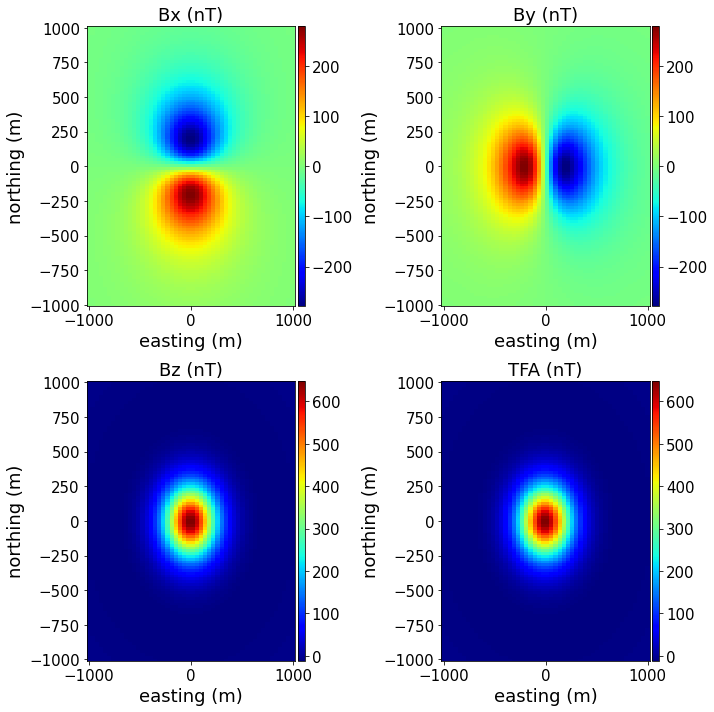

In [14]:
title_font = 18
bottom_font = 15
plt.close('all')
plt.figure(figsize=(10,10), tight_layout=True)

plt.subplot(2,2,1)
plt.xlabel('easting (m)', fontsize = title_font)
plt.ylabel('northing (m)', fontsize = title_font)
plt.title('Bx (nT)', fontsize=title_font)
plt.pcolor(yc,xc,bx.reshape(shape),shading='auto',cmap='jet')
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
cb = plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
cb.ax.tick_params(labelsize=bottom_font)

plt.subplot(2,2,2)
plt.xlabel('easting (m)', fontsize = title_font)
plt.ylabel('northing (m)', fontsize = title_font)
plt.title('By (nT)', fontsize=title_font)
plt.pcolor(yc,xc,by.reshape(shape),shading='auto',cmap='jet')
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
cb = plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
cb.ax.tick_params(labelsize=bottom_font)

plt.subplot(2,2,3)
plt.xlabel('easting (m)', fontsize = title_font)
plt.ylabel('northing (m)', fontsize = title_font)
plt.title('Bz (nT)', fontsize=title_font)
plt.pcolor(yc,xc,bz.reshape(shape),shading='auto',cmap='jet')
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
cb = plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
cb.ax.tick_params(labelsize=bottom_font)

plt.subplot(2,2,4)
plt.xlabel('easting (m)', fontsize = title_font)
plt.ylabel('northing (m)', fontsize = title_font)
plt.title('TFA (nT)', fontsize=title_font)
plt.pcolor(yc,xc,tfa.reshape(shape),shading='auto',cmap='jet')
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
cb = plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
cb.ax.tick_params(labelsize=bottom_font)

plt.show()